In [4]:
##Importing required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [5]:
##Loading Data (Titanic Dataset) from local storage
raw_data = pd.read_csv("C:\\Users\\adity\\Projects\\aiml\\mljorney\\week1\\titanic.csv")

In [6]:
##Basic exploration

In [7]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
'''the columns Age and Cabin have a lot of null values, hence will drop these, the column Embarked has 2 nulls, will remove those 2 rows '''

'the columns Age and Cabin have a lot of null values, hence will drop these, the column Embarked has 2 nulls, will remove those 2 rows '

In [13]:
data_cleaned = raw_data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [14]:
data_cleaned.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [16]:
'''Lets perform some data visualization with matplot lib ans seaborn...'''

'Lets perform some data visualization with matplot lib ans seaborn...'

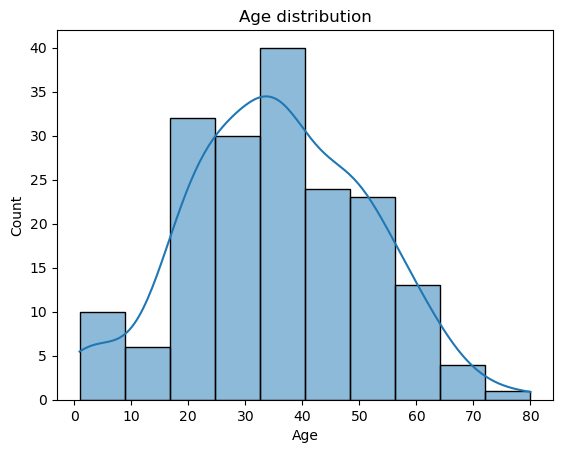

In [17]:
sns.histplot(data_cleaned["Age"],bins=10,kde=True)
plt.title("Age distribution")
plt.show()

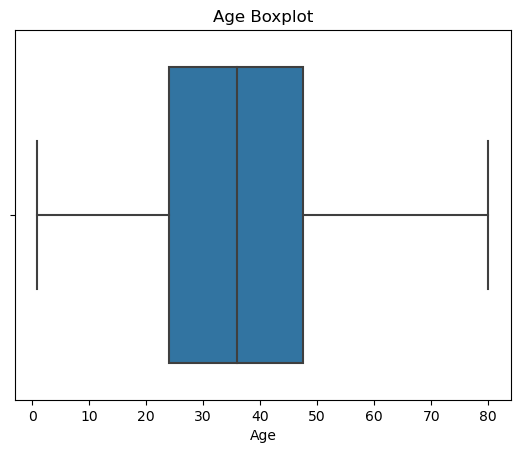

In [18]:
sns.boxplot(x=data_cleaned["Age"])
plt.title("Age Boxplot")
plt.show()

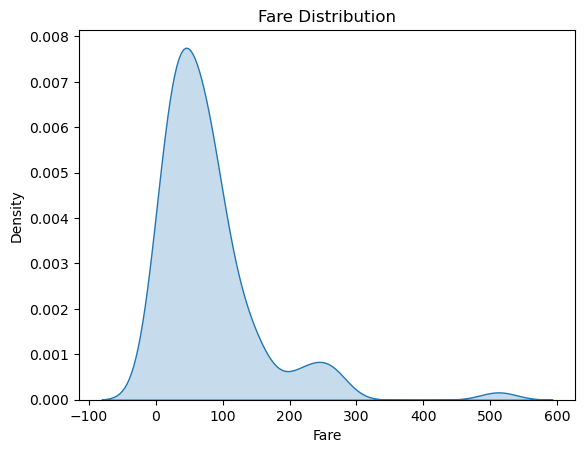

In [19]:
sns.kdeplot(data_cleaned["Fare"], fill=True)
plt.title("Fare Distribution")
plt.show()

In [20]:
data_cleaned.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
data_cleaned.Survived.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [22]:
num_columns = data_cleaned.select_dtypes(include = 'int64')
num_columns

,PassengerId,Survived,Pclass,SibSp,Parch
1,2,1,1,1,0
3,4,1,1,1,0
6,7,0,1,0,0
10,11,1,3,1,1
11,12,1,1,0,0
...,...,...,...,...,...
871,872,1,1,1,1
872,873,0,1,0,0
879,880,1,1,0,1
887,888,1,1,0,0


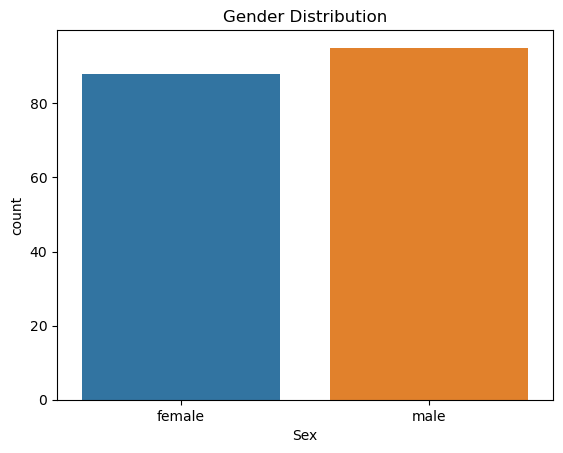

In [23]:
sns.countplot(data=data_cleaned, x="Sex")
plt.title("Gender Distribution")
plt.show()

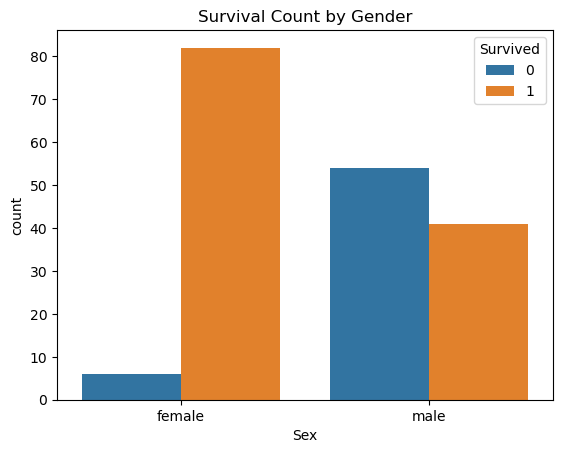

In [24]:
sns.countplot(data=data_cleaned, x="Sex", hue="Survived")
plt.title("Survival Count by Gender")
plt.show()

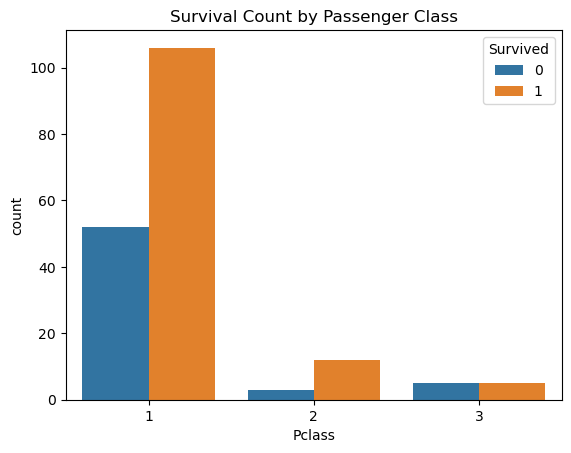

In [25]:
sns.countplot(data=data_cleaned, x="Pclass", hue="Survived")
plt.title("Survival Count by Passenger Class")
plt.show()

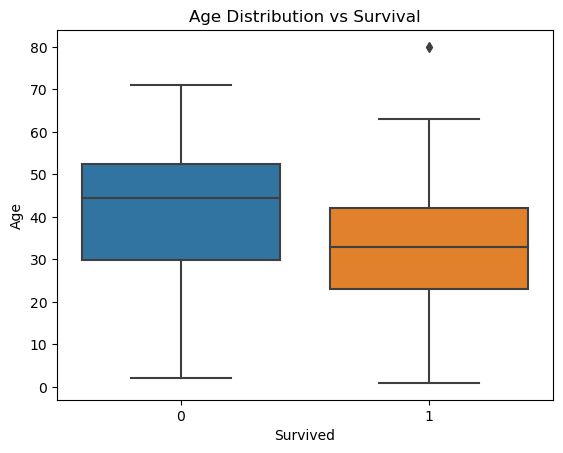

In [26]:
sns.boxplot(data=data_cleaned, x="Survived", y="Age")
plt.title("Age Distribution vs Survival")
plt.show()

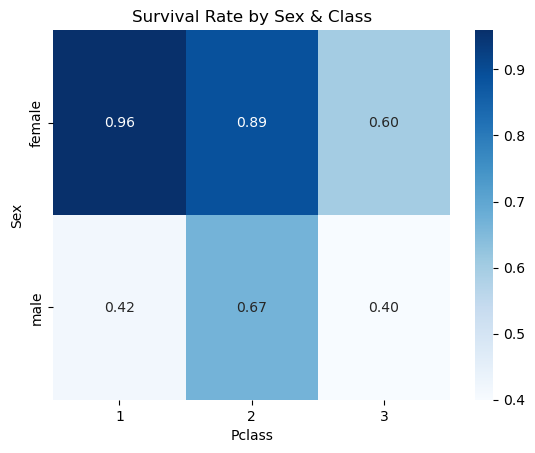

In [27]:
pivot = data_cleaned.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival Rate by Sex & Class")
plt.show()

In [28]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [29]:
data_cleaned = data_cleaned.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [30]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [31]:
data_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

In [33]:
data_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [34]:
data_cleaned['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [35]:
'''Now our dataset seems to be ready, we will move towards model training
the dataset will be trained with 3 different algo : Logistic Regression, Decision Tree, RandomForest 
'''

'Now our dataset seems to be ready, we will move towards model training\nthe dataset will be trained with 3 different algo : Logistic Regression, Decision Tree, RandomForest \n'

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
X = data_cleaned.drop("Survived",axis=1)
y = data_cleaned['Survived']

In [42]:
print(X)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
1         1  38.0      1      0  71.2833         0           0           0
3         1  35.0      1      0  53.1000         0           0           1
6         1  54.0      0      0  51.8625         1           0           1
10        3   4.0      1      1  16.7000         0           0           1
11        1  58.0      0      0  26.5500         0           0           1
..      ...   ...    ...    ...      ...       ...         ...         ...
871       1  47.0      1      1  52.5542         0           0           1
872       1  33.0      0      0   5.0000         1           0           1
879       1  56.0      0      1  83.1583         0           0           0
887       1  19.0      0      0  30.0000         0           0           1
889       1  26.0      0      0  30.0000         1           0           0

[183 rows x 8 columns]


In [39]:
print(y)

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Scaling - needed for Logistic Regression, not trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
331       1  45.5      0      0   28.5000         1           0           1
336       1  29.0      1      0   66.6000         1           0           1
193       2   3.0      1      1   26.0000         1           0           1
75        3  25.0      0      0    7.6500         1           0           1
248       1  37.0      1      1   52.5542         1           0           1
..      ...   ...    ...    ...       ...       ...         ...         ...
520       1  30.0      0      0   93.5000         0           0           1
92        1  46.0      1      0   61.1750         1           0           1
460       1  48.0      0      0   26.5500         1           0           1
872       1  33.0      0      0    5.0000         1           0           1
505       1  18.0      1      0  108.9000         1           0           0

[146 rows x 8 columns]
     Pclass    Age  SibSp  Parch      Fare  Sex_male  Embarked_Q

In [44]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [46]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [47]:
# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
'''Now the omdels will be evaluated with accuracy score'''

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))


Logistic Regression: 0.7297297297297297
Decision Tree: 0.7567567567567568
Random Forest: 0.7027027027027027
